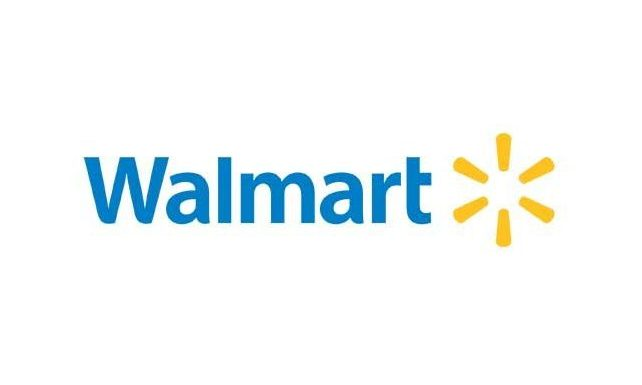

## Retail Analysis with Walmart Data

#### DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

#### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

#### Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

------------------------------------------------

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statistics
import datetime
import math
from scipy.stats import iqr
import warnings
warnings.filterwarnings("ignore")

-------------------------------------

## Importing Data

In [6]:
Walmart= pd.read_csv("Walmart_Store_sales.csv")

______________________________________

## Data Exploration

In [7]:
display(Walmart.head(5))
display(Walmart.tail(5))
display(Walmart.sample(15))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5404,38,06-04-2012,499267.66,0,64.05,4.121,131.037548,11.627
4201,30,18-02-2011,417070.51,0,59.87,3.045,212.903312,8.028
4741,34,09-07-2010,911210.81,0,75.00,2.637,126.151800,9.816
5512,39,05-08-2011,1518790.89,0,87.73,3.684,214.297294,8.177
5152,37,05-03-2010,519255.68,0,51.33,2.625,210.109275,8.554
3724,27,19-03-2010,1700627.97,0,49.04,2.960,135.668225,8.237
4440,32,26-03-2010,1076021.58,0,36.59,2.717,189.719542,9.014
350,3,29-04-2011,367405.40,0,78.69,3.810,219.023610,7.574
4289,30,26-10-2012,439424.50,0,70.50,3.506,223.078337,6.170
316,3,03-09-2010,366473.97,0,84.16,2.577,214.848169,7.346


In [8]:
display(Walmart.size)
display(Walmart.shape)
display(Walmart.describe())
display(Walmart.info())

51480

(6435, 8)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


None

In [9]:
# checking for missing values

Walmart.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
Walmart["Store"].unique()

# There are 45 stores which contribute to this Data set

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [11]:
# Converting Date column to Datetime 

Walmart["Date"] = pd.to_datetime(Walmart["Date"], format = "%d-%m-%Y")

In [12]:
# creating a new column with only month

Walmart["Month"]= Walmart.Date.apply(lambda x: x.month)

In [13]:
#creating a new column with only year

Walmart["Year"]=Walmart.Date.apply(lambda x: x.year)

In [14]:
Walmart.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


In [15]:
#creating new column "Quarter" representing 4 Quarters of a year.
Walmart["Quarter"] = Walmart.Month.apply(lambda x: math.ceil(x/3.0))

In [16]:
Walmart.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter
4695,33,2012-05-18,276899.95,0,89.81,4.308,131.098323,7.396,5,2012,2
4060,29,2011-03-04,536031.67,0,33.52,3.437,133.614143,10.256,3,2011,1
4278,30,2012-08-10,430878.28,0,89.57,3.494,221.595414,6.565,8,2012,3
3652,26,2011-07-29,1005360.50,0,63.32,3.898,135.963935,7.767,7,2011,3
227,2,2011-09-16,1691439.52,0,78.85,3.526,215.694438,7.852,9,2011,3
1409,10,2012-06-08,1840491.41,0,86.87,4.103,130.889677,7.382,6,2012,2
6300,45,2010-04-02,877235.96,0,47.74,2.850,181.865754,8.899,4,2010,2
635,5,2011-04-22,328415.44,0,74.34,3.807,216.028041,6.489,4,2011,2
2700,19,2012-07-06,1557120.44,0,76.07,3.646,138.229633,8.193,7,2012,3
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2,2011,1


------------------------------

## Which store has maximum sales ?

In [17]:
Maxsales=Walmart.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False)
Maxsales.head(1)

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

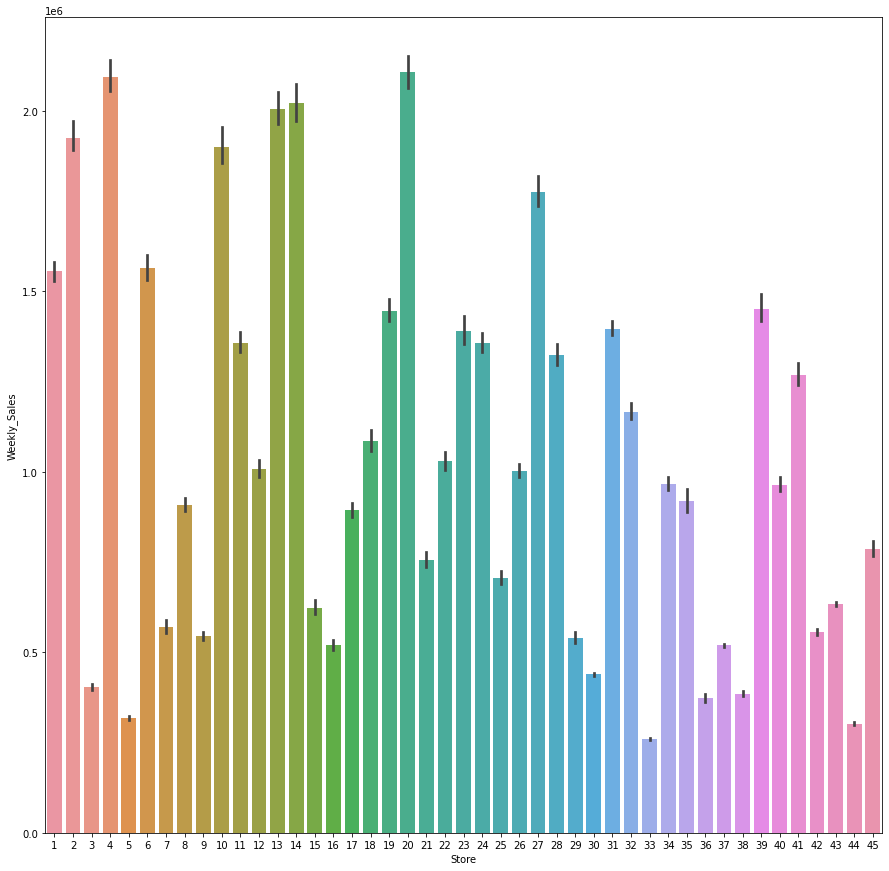

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x=Walmart.Store, y = Walmart.Weekly_Sales)

### <font color= purple> **->From sorting and ploting we can see that Store 20 has the maximum sales.** </font>

____________________________________________________________

## Which store has maximum standard deviation ?

In [19]:
maxstd = Walmart.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
maxstd.head(1)
print("Maximum Standard Deviation is for the Store No. {} ".format(maxstd.idxmax()))

Maximum Standard Deviation is for the Store No. 14 


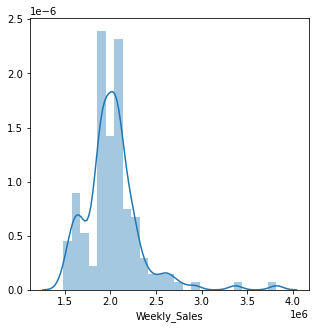

In [20]:
stores = Walmart.groupby('Store')
store14 = stores.get_group(14)
plt.figure(figsize=(5,5))
sns.distplot(store14.Weekly_Sales)

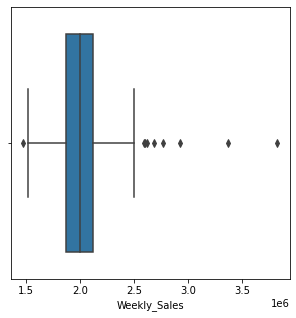

In [32]:
stores = Walmart.groupby('Store')
store14 = stores.get_group(14)
plt.figure(figsize=(5,5))
sns.boxplot(store14.Weekly_Sales)

In [40]:
#top 10 weekly sales of store 14
store14["Weekly_Sales"].sort_values(ascending=False).head(10)

1905    3818686.45
1957    3369068.99
1901    2921709.71
1904    2762861.41
1953    2685351.81
1859    2623469.95
1903    2600519.26
1956    2594363.09
1867    2495630.51
1955    2470581.29
Name: Weekly_Sales, dtype: float64

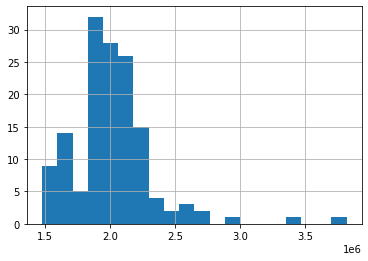

In [21]:
store14["Weekly_Sales"].hist(bins=20)

In [39]:
a=Walmart["Weekly_Sales"].mean() #mean weekly sales of all the stores combined
b=store14["Weekly_Sales"].mean() #mean weekly stores of store14

In [38]:
(b-a)/a *100

93.03211065547698

### <font color=purple> **-> We observe that store 14 has max standard deviation, We can also see mean weekly sales of store 14 is greater than mean weekly sales of all the stores by almost 93%, it is because we have multiple outliers for store 14 as seen in the boxplot.** </font>

________________________________________

## find out the coefficient of mean to standard deviation

In [41]:
#The coefficient of variation represents the ratio of the standard deviation to the mean

cmstd = ((Walmart.groupby('Store')['Weekly_Sales'].std())/(Walmart.groupby('Store')['Weekly_Sales'].mean()))*100
cmstd.sort_values(ascending=False)
print("And Maximum Coefficient of variation is for the Store No. {} ".format(cmstd.idxmax()))

And Maximum Coefficient of variation is for the Store No. 35 


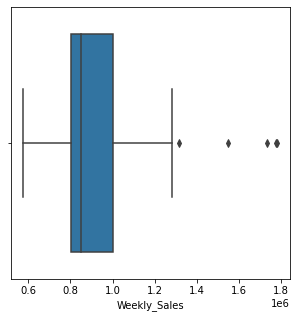

In [42]:
stores = Walmart.groupby('Store')
store35 = stores.get_group(35)
plt.figure(figsize=(5,5))
sns.boxplot(store35.Weekly_Sales)

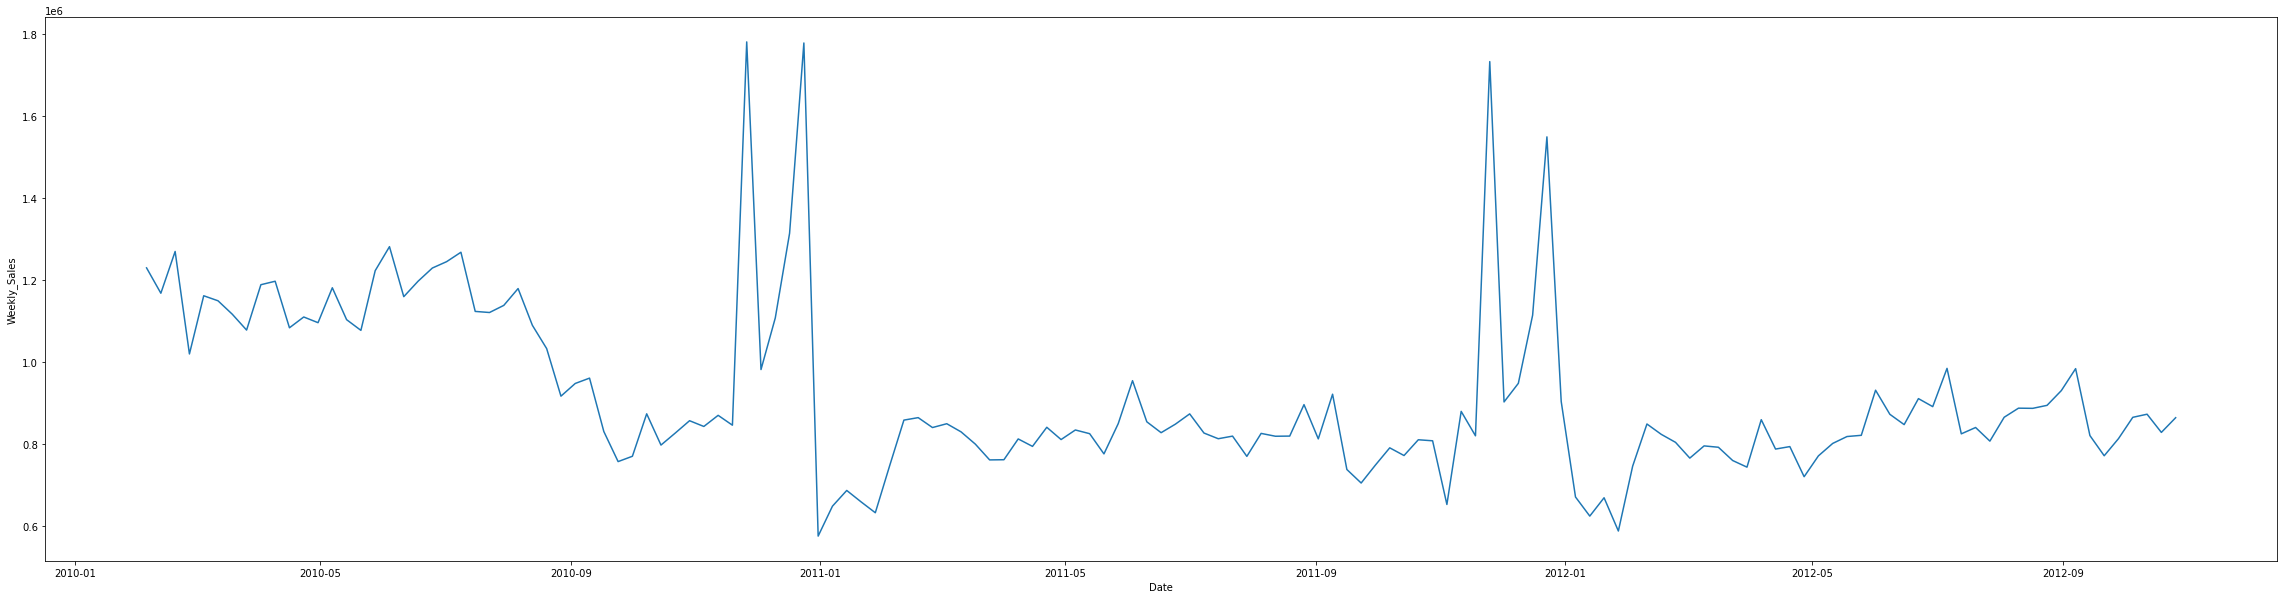

In [43]:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = store35)

In [44]:
store35["Weekly_Sales"].median()

849779.14

In [45]:
store35["Weekly_Sales"].quantile(0.5)

849779.14

In [46]:
q1 = store35["Weekly_Sales"].quantile(0.25)
q3 = store35["Weekly_Sales"].quantile(0.75)
IQR =q3 - q1
limit = q3 + (IQR * 1.5)
print("IQR : {} , IQR *1.5 = {}".format(IQR,limit))


IQR : 201542.46499999997 , IQR *1.5 = 1305379.3875


In [47]:
store35sales=store35.sort_values(by="Weekly_Sales",ascending=False)
store35sales.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter
4904,35,2010-11-26,1781866.98,1,46.67,3.039,136.689571,8.763,11,2010,4
4908,35,2010-12-24,1779236.54,0,31.34,3.141,136.597273,8.763,12,2010,4
4956,35,2011-11-25,1733822.40,1,47.88,3.492,140.421786,8.745,11,2011,4
4960,35,2011-12-23,1550214.02,0,41.59,3.389,140.528765,8.745,12,2011,4
4907,35,2010-12-17,1314987.40,0,31.62,3.140,136.529281,8.763,12,2010,4
4879,35,2010-06-04,1282378.71,0,74.29,2.847,136.218168,9.051,6,2010,2
4864,35,2010-02-19,1270658.64,0,32.44,2.745,135.465778,9.262,2,2010,1
4884,35,2010-07-09,1268766.76,0,82.69,2.793,136.396264,8.861,7,2010,3
4883,35,2010-07-02,1245827.08,0,76.25,2.815,136.372289,8.861,7,2010,3
4862,35,2010-02-05,1230613.50,0,27.19,2.784,135.352461,9.262,2,2010,1


### <font color=purple> **->The median or 50% quantile sales of store35 is 849779.14 and the IQR is 201542.4649 hence the sales above 1305379.3875 are classified as outliers hence we notice top 5 sales is classified as outlier.** </font>

### <font color=purple> **->We see that the outliers are mostly in the month of November and December hence store35 should be ready to meet the sudden increace in demand.** </font>

_________________________________

## Which store/s has good quarterly growth rate in Q3’2012 ?

In [48]:
# taking out 2012 data   
year12 = Walmart.loc[Walmart.Year == 2012,["Store","Weekly_Sales","Quarter"]]

In [49]:
year12

,Store,Weekly_Sales,Quarter
100,1,1550369.92,1
101,1,1459601.17,1
102,1,1394393.84,1
103,1,1319325.59,1
104,1,1636339.65,1
...,...,...,...
6430,45,713173.95,3
6431,45,733455.07,4
6432,45,734464.36,4
6433,45,718125.53,4


In [51]:
quat2 = year12.loc[year12.Quarter==2,["Store","Weekly_Sales","Quarter"]] #quarter2 of year 2012
quat3 = year12.loc[year12.Quarter==3,["Store","Weekly_Sales",'Quarter']] #quarter3 of year 2012

In [52]:
display(quat2.head(10))
display(quat3.head(10))

,Store,Weekly_Sales,Quarter
113,1,1899676.88,2
114,1,1621031.70,2
115,1,1521577.87,2
116,1,1468928.37,2
117,1,1684519.99,2
118,1,1611096.05,2
119,1,1595901.87,2
120,1,1555444.55,2
121,1,1624477.58,2
122,1,1697230.96,2


,Store,Weekly_Sales,Quarter
126,1,1769854.16,3
127,1,1527014.04,3
128,1,1497954.76,3
129,1,1439123.71,3
130,1,1631135.79,3
131,1,1592409.97,3
132,1,1597868.05,3
133,1,1494122.38,3
134,1,1582083.40,3
135,1,1661767.33,3


In [54]:
quat2sum = quat2.groupby("Store")["Weekly_Sales"].sum()
quat3sum = quat3.groupby("Store")["Weekly_Sales"].sum()

In [55]:
display(quat2sum) # sum of sales store wise for the 2nd quarter
display(quat3sum) # sum of sales store wise for the 3rd quarter

Store
1     20978760.12
2     25083604.88
3      5620316.49
4     28454363.67
5      4466363.69
6     20833909.92
7      7290859.27
8     11919630.95
9      7484935.11
10    23750369.17
11    17787371.95
12    13362388.58
13    27009207.14
14    25155535.41
15     7955243.07
16     6564335.98
17    12592400.93
18    13896194.65
19    18367300.24
20    27524197.32
21     9294596.35
22    13487894.06
23    18488882.82
24    17684218.91
25     9323012.09
26    13155335.57
27    22744012.75
28    16506893.13
29     7125307.50
30     5742314.29
31    18267238.50
32    15489271.05
33     3549000.39
34    12853618.02
35    10838313.00
36     4151991.58
37     6824549.37
38     5637918.82
39    20214128.46
40    12727737.53
41    17659942.73
42     7568239.27
43     8168836.35
44     4306405.78
45    10390767.83
Name: Weekly_Sales, dtype: float64

Store
1     20253947.78
2     24303354.86
3      5298005.47
4     27796792.46
5      4163790.99
6     20167312.24
7      8262787.39
8     11748952.70
9      7022149.56
10    23037258.76
11    17516081.44
12    12536324.37
13    26421259.30
14    21187560.65
15     7612081.03
16     7121541.64
17    12459453.05
18    13489765.27
19    18203554.85
20    26891526.98
21     9027599.32
22    12845139.71
23    18641489.15
24    17976377.72
25     9109081.84
26    13675691.91
27    22307711.41
28    16080704.97
29     6671234.14
30     5594701.86
31    17806714.45
32    15396528.95
33     3433620.36
34    12485995.94
35    11322421.12
36     3831691.64
37     6728068.24
38     5605482.38
39    20715116.23
40    12873195.37
41    18093844.01
42     7296759.34
43     8000572.16
44     4411251.16
45     9581268.38
Name: Weekly_Sales, dtype: float64

Q/Q = (Present - previous)/previous

In [56]:
Diff= quat3sum - quat2sum

In [57]:
Q3growth = Diff/quat2sum

In [58]:
# percentage conversion

Q3growthrate = Q3growth*100

In [59]:
# sorting the values
Q3growthrate.sort_values(ascending=False)

Store
7     13.330776
16     8.488378
35     4.466637
26     3.955478
39     2.478404
41     2.456980
44     2.434638
24     1.652088
40     1.142841
23     0.825395
38    -0.575326
32    -0.598751
19    -0.891505
17    -1.055779
37    -1.413736
8     -1.431909
11    -1.525186
27    -1.918313
43    -2.059831
13    -2.176842
25    -2.294647
20    -2.298597
4     -2.310968
31    -2.521038
30    -2.570609
28    -2.581880
34    -2.860067
21    -2.872605
18    -2.924753
10    -3.002523
2     -3.110598
6     -3.199580
33    -3.251057
1     -3.454982
42    -3.587095
15    -4.313659
22    -4.765417
3     -5.734749
12    -6.182010
9     -6.182893
29    -6.372684
5     -6.774475
36    -7.714369
45    -7.790564
14   -15.773764
Name: Weekly_Sales, dtype: float64

<font color=purple> **->Store 7 did the best in Q3 2012 with 13% growth from Q2 2012, followed by store 16,35,26,39,41,44,24,40 and 23 , other stores had negative growth rates.** </font> 

_______________________________________________________

## Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [61]:
Walmart.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1


In [62]:
nonholiday = Walmart.loc[Walmart.Holiday_Flag == 0, ["Store","Weekly_Sales"]]

In [63]:
#non holiday sales
nonholiday

,Store,Weekly_Sales
0,1,1643690.90
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68
5,1,1439541.59
...,...,...
6430,45,713173.95
6431,45,733455.07
6432,45,734464.36
6433,45,718125.53


In [64]:
val=nonholiday.Weekly_Sales.mean()
print("Mean sales of all stores together in non-holiday season : {} ".format(val))

Mean sales of all stores together in non-holiday season : 1041256.3802088564 


In [65]:
holiday = Walmart.loc[Walmart.Holiday_Flag == 1, ["Store","Weekly_Sales","Date"]]

In [66]:
# sales during holiday
holiday.head(5)

,Store,Weekly_Sales,Date
1,1,1641957.44,2010-02-12
31,1,1507460.69,2010-09-10
42,1,1955624.11,2010-11-26
47,1,1367320.01,2010-12-31
53,1,1649614.93,2011-02-11


In [67]:
# stores having holiday sales greater than mean sales of non holiday sales

bestsales=holiday.loc[holiday.Weekly_Sales>val,["Store","Date","Weekly_Sales"]]

In [68]:
bestsales.head()

,Store,Date,Weekly_Sales
1,1,2010-02-12,1641957.44
31,1,2010-09-10,1507460.69
42,1,2010-11-26,1955624.11
47,1,2010-12-31,1367320.01
53,1,2011-02-11,1649614.93


In [69]:
bestholidaysales = bestsales.sort_values(ascending=False,by="Weekly_Sales")
bestholidaysales

,Store,Date,Weekly_Sales
523,4,2011-11-25,3004702.33
1381,10,2011-11-25,2950198.64
1329,10,2010-11-26,2939946.38
1901,14,2010-11-26,2921709.71
2811,20,2011-11-25,2906233.25
...,...,...,...
5721,41,2010-02-12,1075656.34
3658,26,2011-09-09,1069710.97
2096,15,2011-11-25,1066478.10
4824,34,2012-02-10,1047658.09


In [70]:
#exporting best holiday sales for respective stores to a excel file.

bestholidaysales.to_excel("BestHoliday.xlsx")

In [71]:
bestholidaysales.head(10)

,Store,Date,Weekly_Sales
523,4,2011-11-25,3004702.33
1381,10,2011-11-25,2950198.64
1329,10,2010-11-26,2939946.38
1901,14,2010-11-26,2921709.71
2811,20,2011-11-25,2906233.25
1810,13,2011-11-25,2864170.61
2759,20,2010-11-26,2811634.04
471,4,2010-11-26,2789469.45
1758,13,2010-11-26,2766400.05
1953,14,2011-11-25,2685351.81


<font color=purple> **->Clearly top 10 holiday sales which have higher sales than the mean sales in non-holiday season for all stores together is during THANKSGIVING.** </font>

______________________________________

##  Provide a monthly and semester view of sales in units and give insights


In [73]:
#creating a yearwise data 
year2010 = Walmart.loc[Walmart.Year == 2010, ["Store","Weekly_Sales","Month","Quarter"]]
year2011 = Walmart.loc[Walmart.Year == 2011, ["Store","Weekly_Sales","Month","Quarter"]]
year2012 = Walmart.loc[Walmart.Year == 2012, ["Store","Weekly_Sales","Month","Quarter"]]

In [74]:
display(year2010.head(5))
display(year2011.head(5))
display(year2012.head(5))

,Store,Weekly_Sales,Month,Quarter
0,1,1643690.90,2,1
1,1,1641957.44,2,1
2,1,1611968.17,2,1
3,1,1409727.59,2,1
4,1,1554806.68,3,1


,Store,Weekly_Sales,Month,Quarter
48,1,1444732.28,1,1
49,1,1391013.96,1,1
50,1,1327405.42,1,1
51,1,1316899.31,1,1
52,1,1606629.58,2,1


,Store,Weekly_Sales,Month,Quarter
100,1,1550369.92,1,1
101,1,1459601.17,1,1
102,1,1394393.84,1,1
103,1,1319325.59,1,1
104,1,1636339.65,2,1


<font color=green> **2010 analysis** </font>

In [75]:
year2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 6339
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         2160 non-null   int64  
 1   Weekly_Sales  2160 non-null   float64
 2   Month         2160 non-null   int64  
 3   Quarter       2160 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 84.4 KB


In [76]:
# mean monthly sales for the year 2010
# we do not have January data for the year 2010

year2010.groupby("Month")["Weekly_Sales"].mean().sort_values(ascending=False)

Month
12    1.283380e+06
11    1.126963e+06
6     1.068034e+06
2     1.057405e+06
8     1.042445e+06
5     1.037283e+06
7     1.033689e+06
4     1.028499e+06
3     1.010666e+06
9     9.848216e+05
10    9.651637e+05
Name: Weekly_Sales, dtype: float64

In [77]:
#Top months and stores based on thier sales

monthlysummary2010 =year2010.groupby(["Month","Store"])["Weekly_Sales"].mean().sort_values(ascending=False)
monthlysummary2010.head(20)

Month  Store
12     20       2.710758e+06
       14       2.612855e+06
       10       2.586200e+06
       13       2.517538e+06
       4        2.493335e+06
       2        2.438023e+06
11     20       2.322194e+06
6      14       2.276999e+06
11     14       2.265195e+06
       4        2.225047e+06
4      14       2.219340e+06
5      14       2.208807e+06
12     27       2.178660e+06
7      14       2.160057e+06
2      14       2.156959e+06
11     10       2.154309e+06
2      20       2.142562e+06
3      14       2.127549e+06
2      10       2.122321e+06
11     13       2.121682e+06
Name: Weekly_Sales, dtype: float64

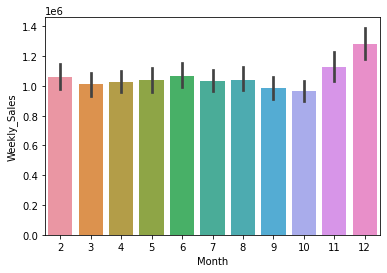

In [78]:
sns.barplot(x=year2010.Month,y=year2010.Weekly_Sales)

In [79]:
year2010.groupby("Quarter")["Weekly_Sales"].mean().sort_values(ascending=False)

Quarter
4    1.125041e+06
2    1.043367e+06
1    1.034036e+06
3    1.021347e+06
Name: Weekly_Sales, dtype: float64

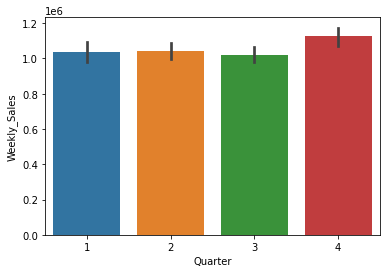

In [80]:
sns.barplot(x=year2010.Quarter,y=year2010.Weekly_Sales)

<font color=purple> **->In 2010, Sales are better during end of the year, we see Dec tops the sales followed by Nov which is why 4th Quarter has better sales, store wise we see sales of  store 20 in Dec has the higest sales of the year.** </font>

<font color=green> **2011 analysis** </font>

In [81]:
year2011.groupby("Month")["Weekly_Sales"].mean().sort_values(ascending=False)

Month
12    1.280347e+06
11    1.167569e+06
6     1.054297e+06
8     1.047774e+06
2     1.035174e+06
7     1.021828e+06
10    1.018118e+06
5     1.009156e+06
4     1.006784e+06
3     9.964247e+05
9     9.815455e+05
1     9.094665e+05
Name: Weekly_Sales, dtype: float64

In [82]:
monthlysummary2011 =year2011.groupby(["Month","Store"])["Weekly_Sales"].mean().sort_values(ascending=False)
monthlysummary2011.head(20)

Month  Store
12     20       2.641267e+06
       4        2.628969e+06
       13       2.560053e+06
       14       2.498249e+06
       10       2.494223e+06
11     4        2.433224e+06
       20       2.407562e+06
12     2        2.355367e+06
11     13       2.257101e+06
       14       2.227576e+06
       10       2.200074e+06
2      20       2.189939e+06
       4        2.175381e+06
10     4        2.150172e+06
8      4        2.121777e+06
11     2        2.099349e+06
6      14       2.090988e+06
12     27       2.083427e+06
6      20       2.083332e+06
10     20       2.078938e+06
Name: Weekly_Sales, dtype: float64

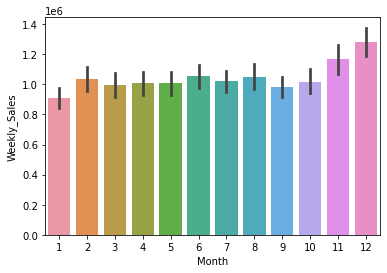

In [83]:
sns.barplot(x=year2011.Month,y=year2011.Weekly_Sales)

In [84]:
year2011.groupby("Quarter")["Weekly_Sales"].mean().sort_values(ascending=False)

Quarter
4    1.164960e+06
2    1.022133e+06
3    1.014855e+06
1    9.803551e+05
Name: Weekly_Sales, dtype: float64

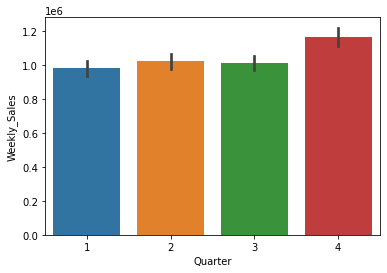

In [85]:
sns.barplot(x=year2011.Quarter,y=year2011.Weekly_Sales)

<font color=purple> **->In 2011, Sales are better during end of the year, we see Dec tops the sales followed by Nov which is why 4th Quarter has better sales, store wise we see sales of  store 20 in Dec has the higest sales of the year.** </font>

<font color=green> **2012 analysis** </font>

In [87]:
year2012.groupby("Month")["Weekly_Sales"].mean().sort_values(ascending=False)

Month
6     1.069379e+06
2     1.067020e+06
8     1.052670e+06
4     1.049561e+06
5     1.048703e+06
7     1.041719e+06
3     1.028932e+06
10    1.024232e+06
9     1.003586e+06
1     9.383026e+05
Name: Weekly_Sales, dtype: float64

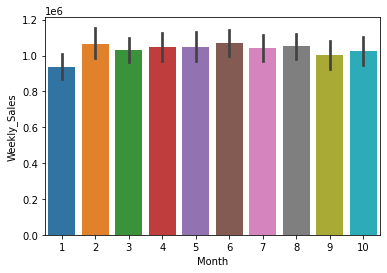

In [88]:
sns.barplot(x=year2012.Month,y=year2012.Weekly_Sales)

In [89]:
monthlysummary2012 =year2012.groupby(["Month","Store"])["Weekly_Sales"].mean().sort_values(ascending=False)
monthlysummary2012.head(20)

Month  Store
2      4        2.300584e+06
       20       2.255341e+06
6      4        2.196894e+06
4      4        2.195978e+06
8      4        2.171569e+06
5      4        2.171495e+06
3      4        2.160942e+06
10     4        2.147431e+06
7      4        2.137232e+06
6      20       2.131358e+06
5      20       2.121455e+06
10     20       2.110094e+06
6      13       2.100427e+06
9      4        2.097505e+06
4      20       2.095397e+06
7      20       2.093616e+06
3      20       2.084048e+06
2      10       2.073531e+06
8      20       2.070329e+06
4      13       2.063766e+06
Name: Weekly_Sales, dtype: float64

In [90]:
year2012.groupby("Quarter")["Weekly_Sales"].mean().sort_values(ascending=False)

Quarter
2    1.056919e+06
3    1.034198e+06
4    1.024232e+06
1    1.012765e+06
Name: Weekly_Sales, dtype: float64

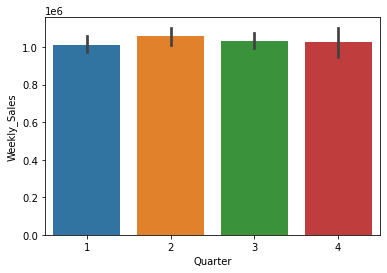

In [91]:
sns.barplot(x=year2012.Quarter,y=year2012.Weekly_Sales)

<font color=purple> **->In 2012, Sales of Jun followed by Feb are on the top, store 4 followed by store 20 in Feb have topped the sales in 2012, overall Quarter 2 does better than other Quarters.** </font>
<font color=red> **Something to consider is that we dont have sales of Nov and Dec in 2012 for analysis, if we had may be they would have topped sales again as in the case of previous two years.** </font>

_________________________________

### For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

In [92]:
Walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1


In [93]:
Walmart["Days"] = Walmart["Date"].apply(lambda x: x.day)

In [94]:
Walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,Days
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1,5


In [95]:
Walmart.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,Days
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531,1.260329e-18,0.000000,2.224951e-18,1.942209e-19
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,7.614332e-02,-0.018378,6.336275e-02,-1.740946e-02
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,1.229958e-01,-0.056783,8.136344e-02,4.452608e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.358618e-01,0.064269,2.444967e-01,2.697332e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-4.215590e-02,0.779470,-4.307778e-02,2.807253e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,4.979672e-03,0.074796,4.733426e-03,2.684300e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-1.274559e-02,-0.241813,-1.787284e-02,-4.233293e-03
Month,1.260329e-18,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.000000e+00,-0.194465,9.670705e-01,1.519184e-02
Year,0.000000e+00,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-1.944645e-01,1.000000,-1.852383e-01,6.405867e-03
Quarter,2.224951e-18,0.063363,8.136344e-02,0.244497,-0.043078,0.004733,-0.017873,9.670705e-01,-0.185238,1.000000e+00,2.254160e-02


We see that weekly sales has positive correlation with HolidayFlag,Fuel price,Month,Quarter and negatively correlated with CPI , Unemployment,year,Temperature.

In [97]:
model1 = Walmart.groupby("Store")["Weekly_Sales","CPI","Holiday_Flag","Fuel_Price","Unemployment","Year","Month","Quarter","Days","Temperature"]
factors = model1.get_group(1)
factors.head()

,Weekly_Sales,CPI,Holiday_Flag,Fuel_Price,Unemployment,Year,Month,Quarter,Days,Temperature
0,1643690.90,211.096358,0,2.572,8.106,2010,2,1,5,42.31
1,1641957.44,211.242170,1,2.548,8.106,2010,2,1,12,38.51
2,1611968.17,211.289143,0,2.514,8.106,2010,2,1,19,39.93
3,1409727.59,211.319643,0,2.561,8.106,2010,2,1,26,46.63
4,1554806.68,211.350143,0,2.625,8.106,2010,3,1,5,46.50


In [99]:
factors.shape

(143, 10)

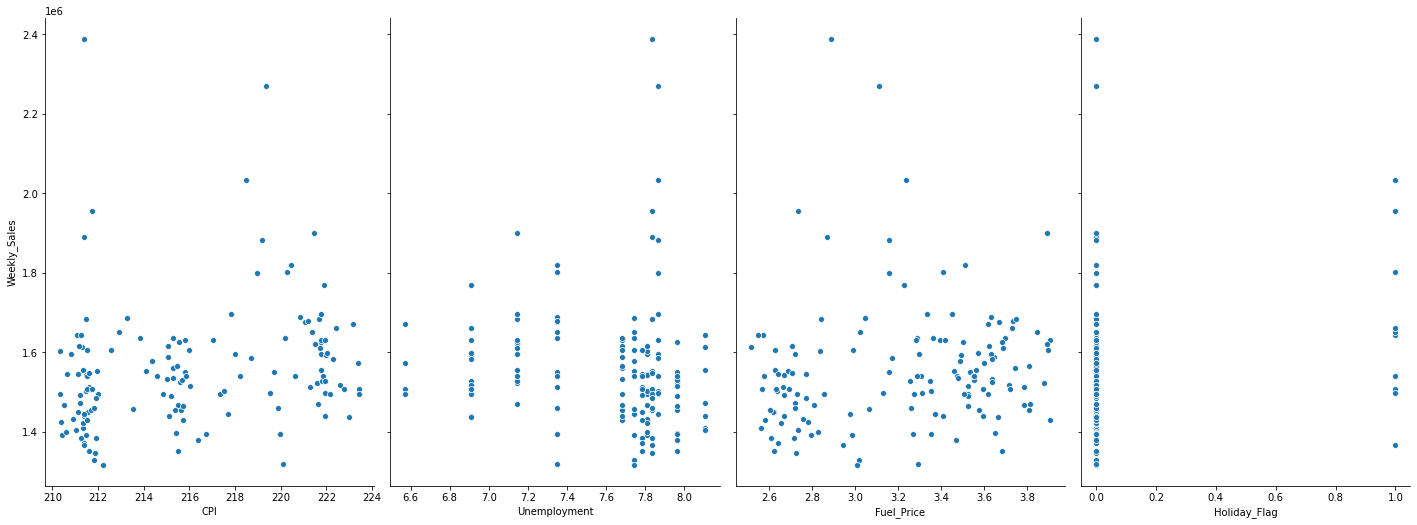

In [100]:
sns.pairplot(factors, x_vars=['CPI','Unemployment','Fuel_Price',"Holiday_Flag"], y_vars='Weekly_Sales', size=7, aspect=0.7)


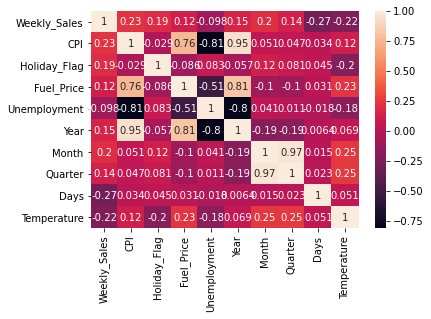

In [101]:
# heatmap of correlation 

sns.heatmap(factors.corr(), annot = True)


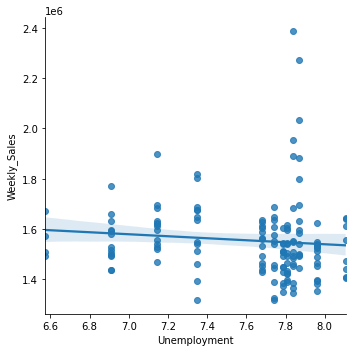

In [102]:
# relation between Unemployement and Weekly sales

sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

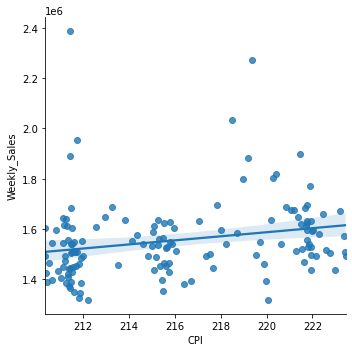

In [103]:
#relation between CPI and weekly sales

sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors)

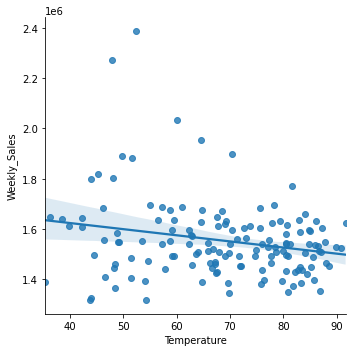

In [104]:
#relation between temperature and weekly sales

sns.lmplot(x='Temperature', y = 'Weekly_Sales', data = factors)

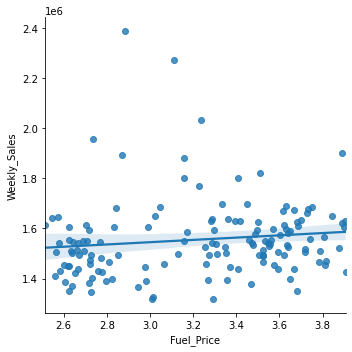

In [105]:
# relation between fuel price and weekly sales

sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

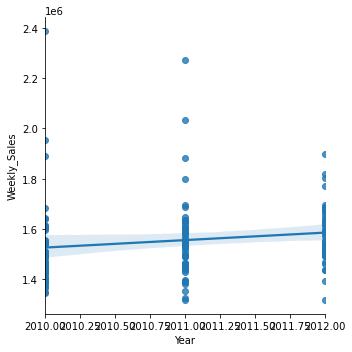

In [106]:
#relation between year and weekly sales

sns.lmplot(x='Year', y = 'Weekly_Sales', data = factors)

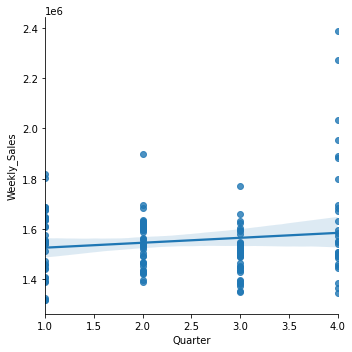

In [107]:
#relation between quarter and weekly sales

sns.lmplot(x='Quarter', y = 'Weekly_Sales', data = factors)

<font color=purple> **From the above graphs it seems unemployment and temperature are inversely related to Weekly sales and Quarter,year, fuel price, CPI are positively related to weekly sales.** </font>

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LM = LinearRegression()

In [166]:
X=factors.drop("Weekly_Sales",axis=1)
y=factors["Weekly_Sales"]

In [167]:
display(X.head())
display(y.head())

,CPI,Holiday_Flag,Fuel_Price,Unemployment,Year,Month,Quarter,Days,Temperature
0,211.096358,0,2.572,8.106,2010,2,1,5,42.31
1,211.242170,1,2.548,8.106,2010,2,1,12,38.51
2,211.289143,0,2.514,8.106,2010,2,1,19,39.93
3,211.319643,0,2.561,8.106,2010,2,1,26,46.63
4,211.350143,0,2.625,8.106,2010,3,1,5,46.50


0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [169]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((107, 9), (36, 9), (107,), (36,))

In [170]:
LM.fit(X_train,y_train)

LinearRegression()

In [171]:
y_pred = LM.predict(X_test)

In [172]:
LM.score(X_train, y_train)  #accuracy of the model on train data-set is 74.9%

0.32148556185383736

In [173]:
LM.score(X_test,y_test) #accuracy of your model on the test dataset 

0.19329250147013033

---------------------------------

## <font color=green> **Insights** </font>

### <font color= purple> **->From sorting and ploting we can see that Store 20 has the maximum sales.** </font>

### <font color=purple> **-> We observe that store 14 has max standard deviation, We can also see mean weekly sales of store 14 is greater than mean weekly sales of all the stores by almost 93%, it is because we have multiple outliers for store 14 as seen in the boxplot.** </font>

### <font color=purple> **->The median or 50% quantile sales of store35 is 849779.14 and the IQR is 201542.4649 hence the sales above 1305379.3875 are classified as outliers hence we notice top 5 sales is classified as outlier.** </font> <font color=purple> *We see that the outliers are mostly in the month of November and December hence store35 should be ready to meet the sudden increace in demand.* </font>

### <font color=purple> **->Store 7 did the best in Q3 2012 with 13% growth from Q2 2012, followed by store 16,35,26,39,41,44,24,40 and 23 , other stores had negative growth rates.** </font> 

### <font color=purple> **->Clearly top 10 holiday sales which have higher sales than the mean sales in non-holiday season for all stores together is during THANKSGIVING.** </font>

### <font color=purple> **->In 2010, Sales are better during end of the year, we see Dec tops the sales followed by Nov which is why 4th Quarter has better sales, store wise we see sales of  store 20 in Dec has the higest sales of the year.** </font>

### <font color=purple> **->In 2011, Sales are better during end of the year, we see Dec tops the sales followed by Nov which is why 4th Quarter has better sales, store wise we see sales of  store 20 in Dec has the higest sales of the year.** </font>

### <font color=purple> **->In 2012, Sales of Jun followed by Feb are on the top, store 4 followed by store 20 in Feb have topped the sales in 2012, overall Quarter 2 does better than other Quarters.** </font> <font color=red> **Something to consider is that we dont have sales of Nov and Dec in 2012 for analysis, if we had may be they would have topped sales again as in the case of previous two years.** </font>

__________________________________________________